# Wine

**Implementación de algoritmos de clasificación basados en regresión logística para el dataset de vinos**

El conjunto de datos de vinos ("wine.data") contiene información química sobre 178 muestras de vino. Cada muestra está clasificada en una de tres variedades de vino (Clases 1, 2 y 3), y se describen mediante 13 características químicas, como el contenido de alcohol, el nivel de ácido málico, la cantidad de cenizas, y otros componentes que influyen en la calidad y el perfil sensorial del vino.








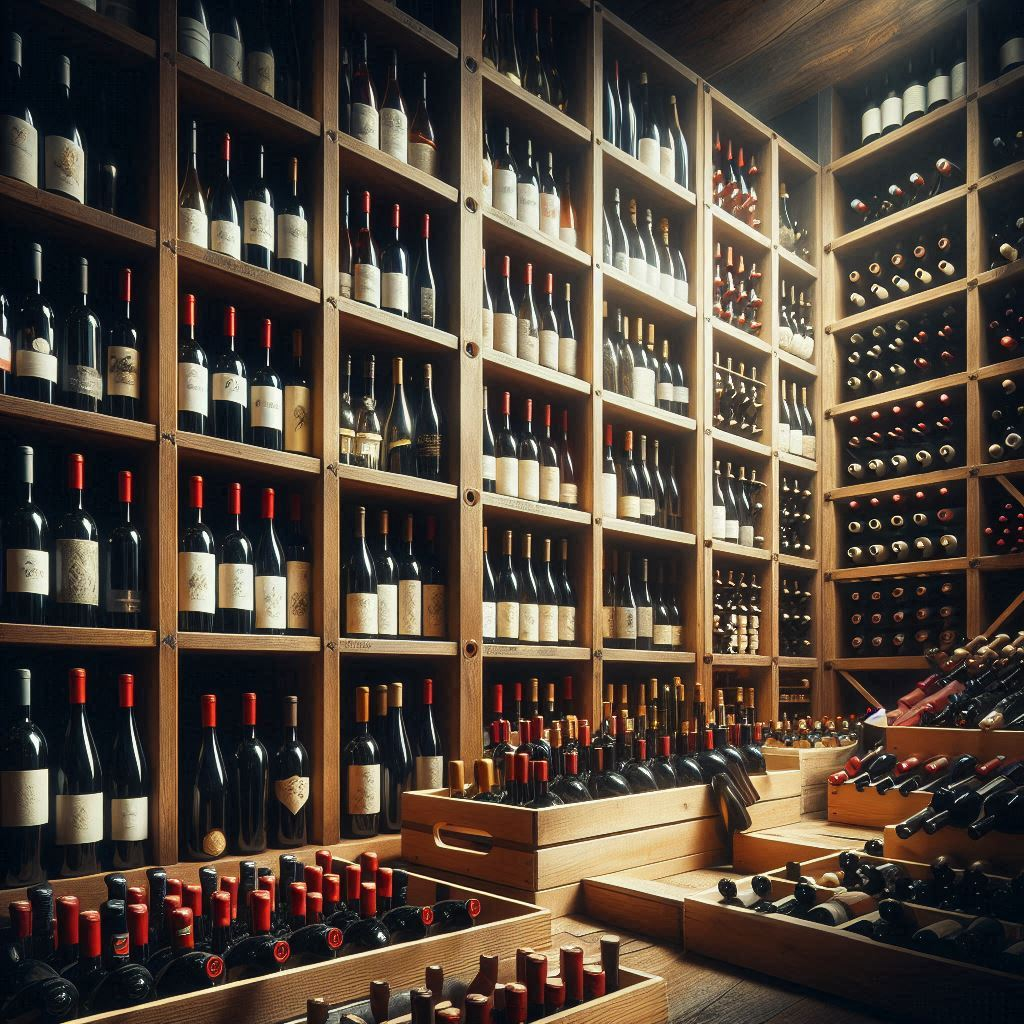

## Librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

## Lectura de Datos

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
           "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine = pd.read_csv("wine.data", names = columns )

## Exploración de Datos

Se comienza con una exploración ya que nos permite tener una mejor comprensión sobre los datos con los que se está trabajando

"Cuanto mejor conozca un analista los datos con los que trabaja, mejor será el análisis que haga." Exploración de Datos (2024) Alteryx. Available at: https://www.alteryx.com/es/glossary/data-exploration.

In [4]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

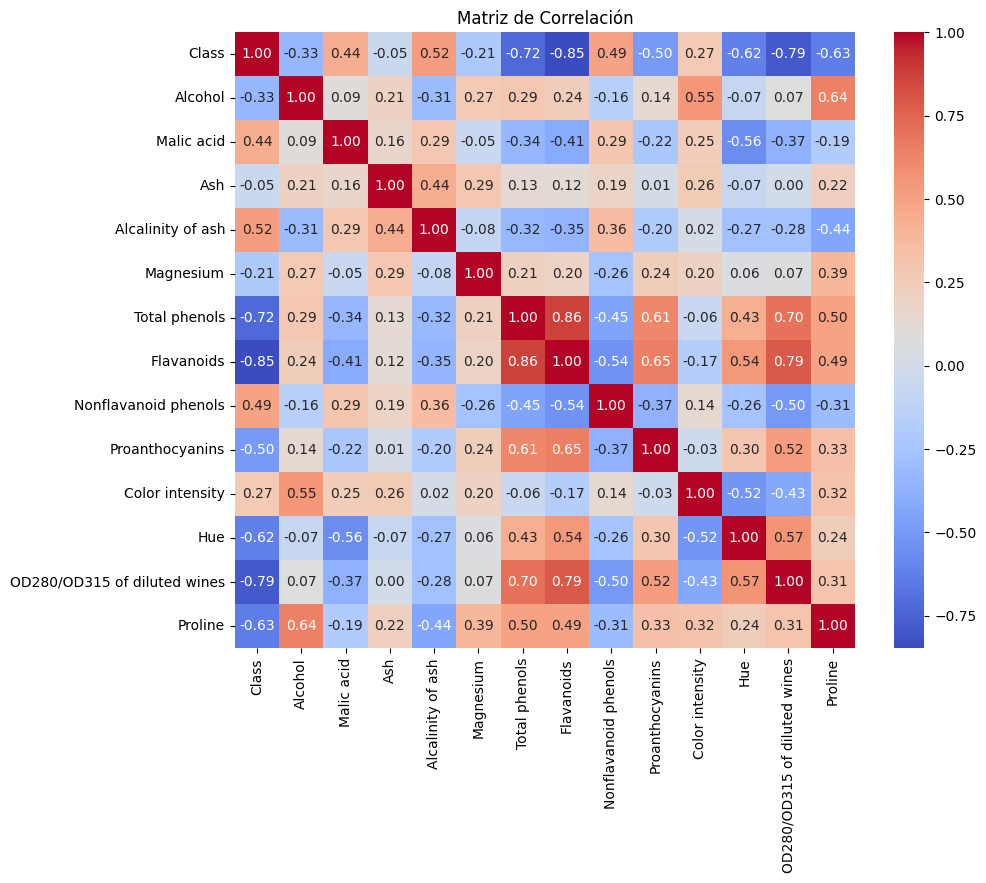

In [7]:
matrix = wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## Selección de variables

Para la selección de características se decidió elegir "Alcohol como la variable relevante ya que el contenido de alcohol es un factor clave que afecta el sabor, el cuerpo y la percepción general del vino. Diferentes niveles de alcohol pueden llevar a características sensoriales distintas que son críticas para clasificar el vino en diferentes categorías o clases. En la industria vinícola, el contenido de alcohol es uno de los principales factores considerados al categorizar vinos. Las regulaciones y clasificaciones de vinos en muchas regiones se basan en parte en su contenido de alcohol, lo que refuerza su relevancia.

Y como característica no relevante se considera "Ash" ya que la cantidad de ceniza en el vino podría tener menos variabilidad entre diferentes clases de vino en comparación con otras características. Asimismo en el análisis exploratorio previo observamos que "Ash" tiene una correlación más baja con las clases de vino en comparación con otras características, sugiriendo que es menos informativa para la clasificación.

In [8]:
# Seleccionar características relevantes y no relevantes
feature_relevant = "Alcohol"
feature_non_relevant = "Ash"

In [9]:
X = wine[[feature_relevant, feature_non_relevant]]
y = wine['Class']

## Estandarización

In [10]:
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## División del conjunto de Datos

In [11]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Modelo

Se implementa la regresión logística como técnica principal para clasificar el conjunto de datos. La **regresión logística** es un método de clasificación que estima la probabilidad de que un dato pertenezca a una clase específica, basándose en una o más características predictoras. Dado que el problema es de clasificación multiclase (tres clases de vino), se empleó un enfoque de regresión logística multinomial.

Para implementar este modelo, se utilizó la configuración multi_class='ovr' (one-vs-rest). Este método descompone el problema multiclase en múltiples problemas binarios, donde se construye un clasificador para cada clase individual contra todas las demás. Este enfoque permite manejar situaciones donde las clases no son linealmente separables, al enfocarse en la distinción de una clase en particular contra el resto.

Además, se estableció max_iter=300000, lo que fija el número máximo de iteraciones que el algoritmo de optimización puede realizar. Este parámetro es crucial cuando se trabaja con modelos complejos o cuando los datos requieren un número elevado de iteraciones para que los parámetros del modelo (Theta) converjan a valores óptimos. En este caso, se permitió un gran número de iteraciones para asegurarse de que el modelo alcanzara la convergencia y no se detuviera prematuramente.

Se prueban diferentes combinaciones de características (relevantes, no relevantes, y sus términos cuadráticos) para determinar cuál ofrecía el mejor rendimiento en términos de precisión y otras métricas de evaluación.

Para cada combinación de características se generaron y compararon las matrices de confusión, junto con métricas de evaluación clave como el MSE, RMSE, MAE y R², para determinar qué enfoque de modelado proporcionaba los mejores resultados para la clasificación de los vinos.
* MSE (Error Cuadrático Medio): Mide el promedio de los cuadrados de los errores o diferencias entre los valores predichos y los reales.
* RMSE (Raíz del Error Cuadrático Medio): Es la raíz cuadrada del MSE y proporciona una medida más interpretable del error.
* MAE (Error Absoluto Medio): Mide el promedio de las diferencias absolutas entre las predicciones y los valores reales.
* R² (Coeficiente de Determinación): Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.

Jeiinns@gmail.com (2023) Métricas de Evaluación en machine learning, Inteligencia Artificial. Available at: https://databitai.com/machine-learning/metricas-de-evaluacion-en-machine-learning/

In [12]:
def train_and_evaluate(X_train, X_test, y_train, y_test, title):
    model = LogisticRegression(multi_class='ovr', max_iter=300000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Imprimir valores de Theta (coeficientes) y el número de iteraciones
    print(f"Theta (Coeficientes): {model.coef_}")
    print(f"Número de iteraciones realizadas: {model.n_iter_}")

    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

    # Generar el reporte de clasificación
    print(classification_report(y_test, y_pred, zero_division=1))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', "3"], yticklabels=['1', '2', "3"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

    # Gráfica de Predicciones vs Datos Reales
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicciones', marker='o')
    plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Datos Reales', marker='D')
    plt.xlabel('Datos Reales')
    plt.ylabel('Predicciones')
    plt.title('Predicciones vs Datos Reales')
    plt.legend()
    plt.show()

    return cm

## Clasificación usando la característica relevante (Alcohol)

Usando característica relevante: Alcohol
Theta (Coeficientes): [[ 1.95518432]
 [-2.23900943]
 [ 0.20594164]]
Número de iteraciones realizadas: [7 7 3]
MSE: 0.9444444444444444
RMSE: 0.97182531580755
MAE: 0.5370370370370371
R²: -0.5674445076835517
              precision    recall  f1-score   support

           1       0.60      0.95      0.73        19
           2       0.82      0.86      0.84        21
           3       0.00      0.00      0.00        14

    accuracy                           0.67        54
   macro avg       0.47      0.60      0.52        54
weighted avg       0.53      0.67      0.58        54



c:\Users\erika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


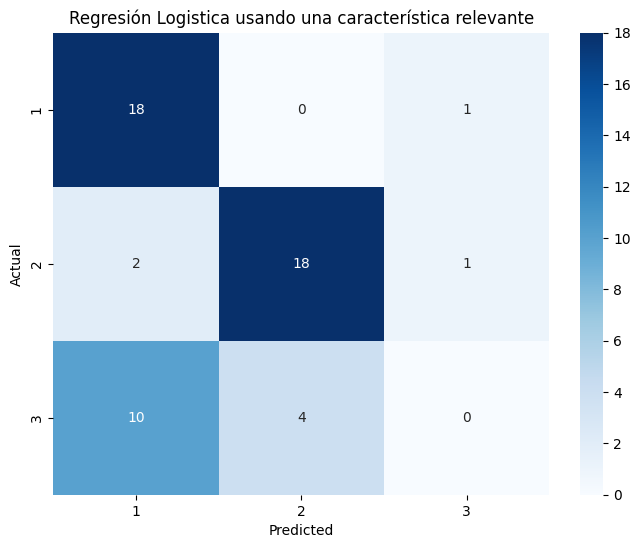

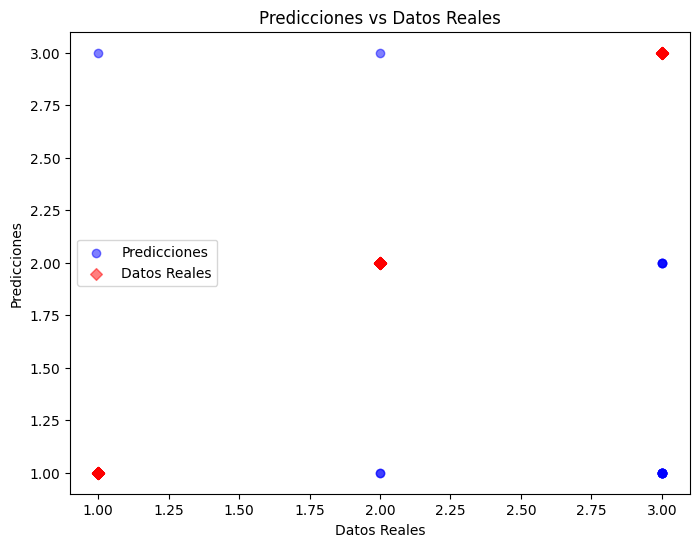

In [13]:
print("Usando característica relevante:", feature_relevant)
X_train_rel = X_train[:, [0]]
X_test_rel = X_test[:, [0]]
cm_relevant = train_and_evaluate(X_train_rel, X_test_rel, y_train, y_test, 'Regresión Logistica usando una característica relevante')

El número de iteraciones aparece como una lista de tres números, como [8 8 5], debido a que el modelo de regresión logística se está entrenando en un problema de clasificación multiclase con tres clases distintas (en este caso, los diferentes tipos de vino representados en la columna "Class"). Esto ocurre porque cuando se utiliza la opción multi_class='ovr' en LogisticRegression, el algoritmo de regresión logística crea un modelo independiente para cada clase en el dataset. Específicamente, entrena un modelo binario para cada clase en el que esa clase se enfrenta a todas las demás (one-vs-rest).

El número de iteraciones mostradas en [8 8 5] indica cuántas iteraciones se necesitaron para que cada uno de estos tres modelos independientes convergiera.
El primer número (8) es el número de iteraciones necesarias para entrenar el modelo para la primera clase. El segundo número (8) es para la segunda clase.
El tercer número (5) es para la tercera clase. Cada modelo puede requerir un número diferente de iteraciones para alcanzar la convergencia, dependiendo de la complejidad de los datos y de las relaciones entre las características y la clase objetivo.


## Clasificación usando la característica no relevante (Ash)


Usando característica no relevante: Ash
Theta (Coeficientes): [[ 0.4614358 ]
 [-0.75795106]
 [ 0.30563154]]
Número de iteraciones realizadas: [4 4 3]
MSE: 0.9074074074074074
RMSE: 0.9525793444156804
MAE: 0.6481481481481481
R²: -0.5059760956175301
              precision    recall  f1-score   support

           1       0.46      0.58      0.51        19
           2       0.50      0.71      0.59        21
           3       1.00      0.00      0.00        14

    accuracy                           0.48        54
   macro avg       0.65      0.43      0.37        54
weighted avg       0.61      0.48      0.41        54



c:\Users\erika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


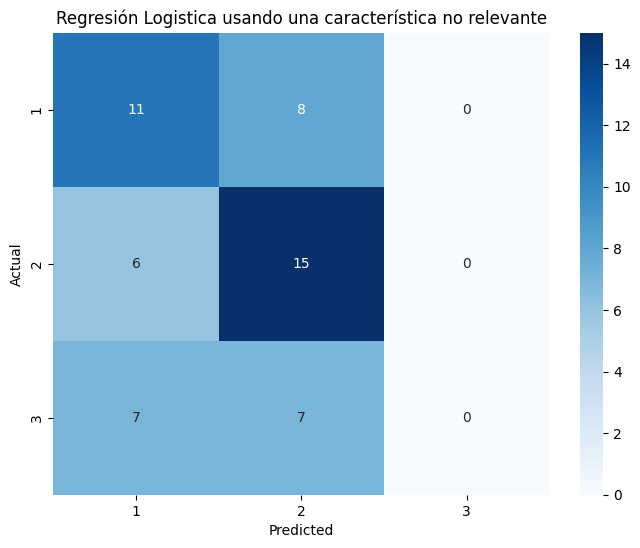

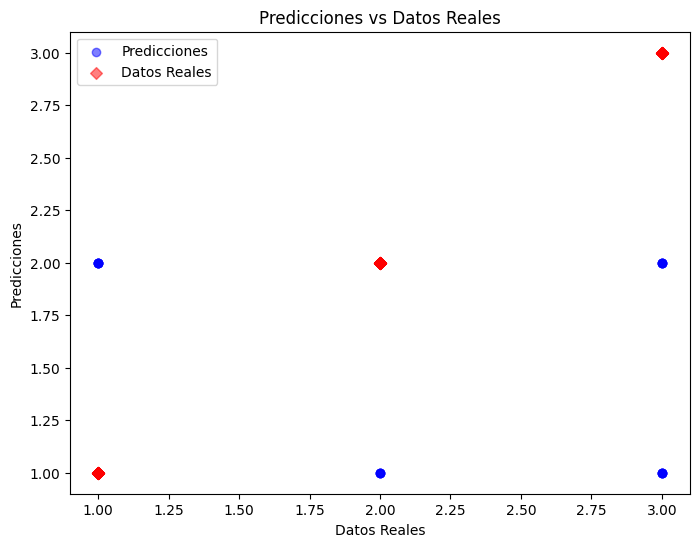

In [14]:
print("\nUsando característica no relevante:", feature_non_relevant)
X_train_non_rel = X_train[:, [1]]
X_test_non_rel = X_test[:, [1]]
cm_non_relevant = train_and_evaluate(X_train_non_rel, X_test_non_rel, y_train, y_test, 'Regresión Logistica usando una característica no relevante')

## Clasificación usando ambas características


Usando ambas características
Theta (Coeficientes): [[ 1.91047793  0.35720274]
 [-2.2073265  -0.74657836]
 [ 0.16749318  0.28481638]]
Número de iteraciones realizadas: [7 7 4]
MSE: 0.7777777777777778
RMSE: 0.8819171036881969
MAE: 0.4444444444444444
R²: -0.29083665338645437
              precision    recall  f1-score   support

           1       0.64      0.95      0.77        19
           2       0.80      0.95      0.87        21
           3       1.00      0.07      0.13        14

    accuracy                           0.72        54
   macro avg       0.81      0.66      0.59        54
weighted avg       0.80      0.72      0.64        54



c:\Users\erika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


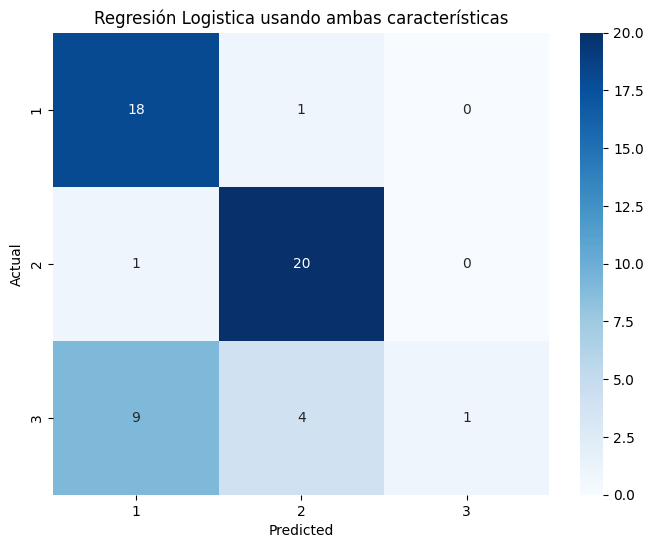

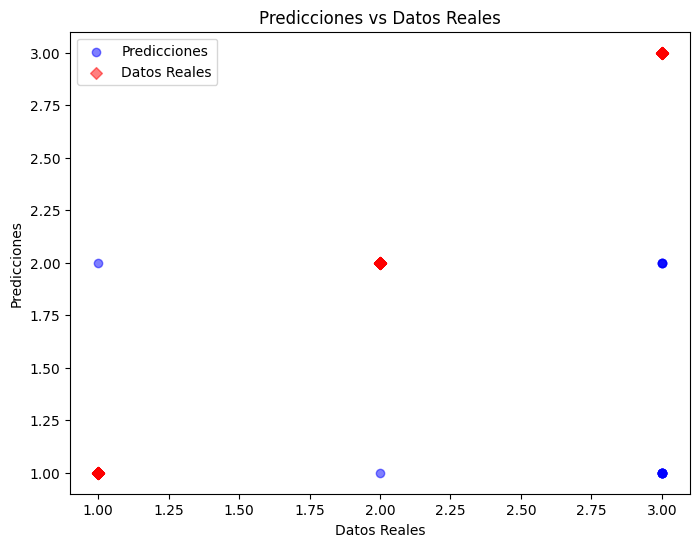

In [15]:
print("\nUsando ambas características")
cm_both = train_and_evaluate(X_train, X_test, y_train, y_test, 'Regresión Logistica usando ambas características')

## Clasificación usando ambas características y sus cuadrados


Usando ambas características y sus cuadrados
Theta (Coeficientes): [[ 2.06413972  0.25739096 -0.14278395  0.15713964]
 [-2.02012336 -1.04000853  0.61902172  0.37170209]
 [ 0.18926463  0.8687019  -1.21341198 -1.00346259]]
Número de iteraciones realizadas: [11 10  9]
MSE: 0.7222222222222222
RMSE: 0.8498365855987975
MAE: 0.3888888888888889
R²: -0.19863403528742207
              precision    recall  f1-score   support

           1       0.71      0.79      0.75        19
           2       0.91      0.95      0.93        21
           3       0.64      0.50      0.56        14

    accuracy                           0.78        54
   macro avg       0.75      0.75      0.75        54
weighted avg       0.77      0.78      0.77        54



c:\Users\erika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


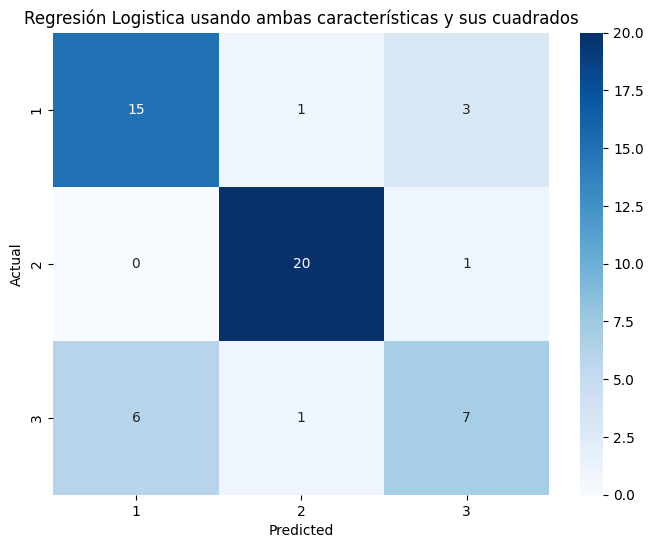

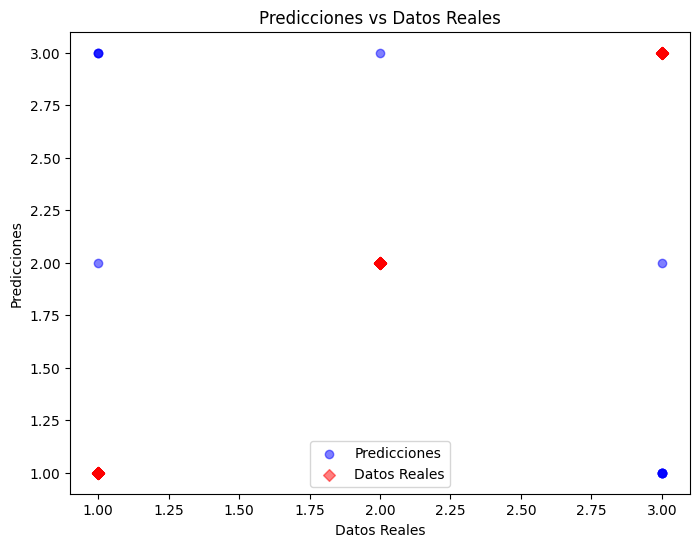

In [16]:
print("\nUsando ambas características y sus cuadrados")
X_train_squared = np.hstack((X_train, X_train ** 2))
X_test_squared = np.hstack((X_test, X_test ** 2))
cm_squared = train_and_evaluate(X_train_squared, X_test_squared, y_train, y_test, 'Regresión Logistica usando ambas características y sus cuadrados')

## Conclusión

**Desempeño Comparativo de los Modelos**

*Modelo con ambas características y sus cuadrados*

* Métricas: Este modelo obtuvo las mejores métricas en términos de MSE (0.722), RMSE (0.850), MAE (0.389), y un R² menos negativo (-0.199), lo que indica un mejor ajuste en comparación con los otros modelos.
* Precisión y Recall: Presenta un balance más favorable en precisión y recall, especialmente para las clases 1 y 2, con un accuracy del 78%.
* Matriz de Confusión: Muestra una mejor capacidad de clasificación para las clases 1 y 2, aunque todavía tiene dificultad para clasificar correctamente la clase 3, pero es el único modelo que mejora la clasificación de esta clase.

*Modelo con ambas características*

* Métricas: Segundo mejor desempeño con un MSE de 0.778, RMSE de 0.882, MAE de 0.444, y R² de -0.291.
* Precisión y Recall: También presenta buenos resultados para las clases 1 y 2, aunque muestra una baja capacidad para clasificar la clase 3.
* Matriz de Confusión: Similar al modelo con características cuadradas, aunque con menos capacidad de clasificación para la clase 3 pero mejor capacidad para clasificar la clase 1.

*Modelo con característica relevante (Alcohol)*

* Métricas: Tiene un desempeño moderado con MSE de 0.944, RMSE de 0.972, MAE de 0.537 y un R² de -0.567.
* Precisión y Recall: Buen desempeño para las clases 1 y 2, pero con una alta confusión en la clasificación de la clase 3, se observa un accuracy del 67%.
* Matriz de Confusión: El modelo confunde la clase 3 con las otras clases, sobretodo con la clase 1, lo que reduce su efectividad.

*Modelo con característica no relevante (Ash):*

* Métricas: Modelo con peor desempeño con MSE de 0.907, RMSE de 0.953, MAE de 0.648 y R² de -0.506.
* Precisión y Recall: La precisión y recall son bajas, especialmente para la clase 3, con un accuracy general de solo el 48%.
* Matriz de Confusión: El modelo tiene una alta confusión entre las clases, lo que demuestra que "Ash" no es una característica adecuada para la clasificación.


¿Considera que este tipo de modelos puede ser útil para este
problema de clasificación?

Los resultados muestran que la regresión logística puede ser una herramienta útil para la clasificación de vinos en este conjunto de datos, especialmente cuando se utilizan múltiples características y se incluyen términos cuadráticos. Sin embargo, la dificultad para clasificar correctamente la clase 3 en todos los modelos sugiere que, aunque la regresión logística es viable, puede ser necesario explorar modelos más complejos o ajustar mejor los parámetros para mejorar el desempeño, particularmente en casos donde las clases no son linealmente separables.

El modelo que utiliza ambas características junto con sus cuadrados se desempeña mejor, lo que sugiere que la complejidad adicional en la relación entre características es relevante para la clasificación. Por tanto, este tipo de modelo es potencialmente útil, pero con espacio para mejoras.
Este análisis sugiere que, aunque la regresión logística puede capturar bastante bien la estructura de los datos, la adición de términos no lineales mejora significativamente el rendimiento del modelo, haciéndolo una opción válida para esta tarea de clasificación.

In [17]:
!jupyter nbconvert --to html /content/drive/MyDrive/Agos-Dic2024/ML/Wine.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
